In [1]:
!pip install datasets

#implementing custom activation
!pip install -q monai

!pip install patchify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import cv2
import os

In [3]:
image_folder = '/content/drive/MyDrive/training-free-object-counter-main/dataset/data/test/images'
label_folder = '/content/drive/MyDrive/training-free-object-counter-main/dataset/data/test/labels'

In [4]:
# List all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(".JPG")]

# List all label files in the folder
text_files = [f for f in os.listdir(label_folder) if f.endswith(".txt")]

image_files.sort()
text_files.sort()

In [5]:
print(text_files)

['IMG_113.txt', 'IMG_123.txt', 'IMG_137.txt', 'IMG_146.txt', 'IMG_23.txt', 'IMG_3.txt', 'IMG_36.txt', 'IMG_37.txt', 'IMG_41.txt', 'IMG_43.txt', 'IMG_45.txt', 'IMG_50.txt', 'IMG_76.txt', 'IMG_85.txt', 'IMG_88.txt', 'IMG_96.txt', 'IMG_97.txt']


In [6]:
import os
import numpy as np
from PIL import Image

# Define the patch size
patch_size = 256

# Create the output_patch folder if it doesn't exist
output_img_folder = 'output_patch/image'
os.makedirs(output_img_folder, exist_ok=True)

# Create the output_patch folder if it doesn't exist
output_label_folder = 'output_patch/label'
os.makedirs(output_label_folder, exist_ok=True)

for img_file, label_file in zip(image_files, text_files):
    img_path = os.path.join(image_folder, img_file)
    label_path = os.path.join(label_folder, label_file)

    # Read the point annotation data from a text file (assuming one point per line in x, y format)
    with open(label_path, 'r') as f:
        annotation_lines = f.readlines()

    # Extract the points as tuples (x, y)
    annotations = [list(map(float, line.strip().split())) for line in annotation_lines]

    # Open the image using PIL
    img = Image.open(img_path)
    img_width, img_height = img.size

    # Iterate through patches
    for patch_x in range(0, img_width, patch_size):
        for patch_y in range(0, img_height, patch_size):
            # Define the patch boundaries
            patch_left = patch_x
            patch_upper = patch_y
            patch_right = min(patch_x + patch_size, img_width)
            patch_lower = min(patch_y + patch_size, img_height)

            # Filter coordinates that are within the patch boundaries
            coordinates_in_patch = [
                (x, y) for x, y in annotations
                if patch_left <= x < patch_right and patch_upper <= y < patch_lower
            ]

            # If there are coordinates in the patch, create a corresponding text file
            if coordinates_in_patch:
                # Modify coordinates relative to the patch
                modified_coordinates = [(x - patch_left, y - patch_upper) for x, y in coordinates_in_patch]

                # Save the patch image
                patch = img.crop((patch_left, patch_upper, patch_right, patch_lower))
                patch_filename = os.path.splitext(img_file)[0] + f'_patch_{patch_x}_{patch_y}.jpg'
                patch_path = os.path.join(output_img_folder, patch_filename)
                patch.save(patch_path)

                # Save the modified coordinates in a text file
                label_filename = os.path.splitext(patch_filename)[0] + '.txt'
                label_path = os.path.join(output_label_folder, label_filename)
                with open(label_path, 'w') as label_file:
                    for x, y in modified_coordinates:
                        label_file.write(f"{x} {y}\n")

                print(f"Created patch: {patch_filename} label: {label_filename}")

# Continue processing other image-label pairs

Created patch: IMG_113_patch_0_2048.jpg label: IMG_113_patch_0_2048.txt
Created patch: IMG_113_patch_0_2304.jpg label: IMG_113_patch_0_2304.txt
Created patch: IMG_113_patch_0_2560.jpg label: IMG_113_patch_0_2560.txt
Created patch: IMG_113_patch_0_2816.jpg label: IMG_113_patch_0_2816.txt
Created patch: IMG_113_patch_0_3072.jpg label: IMG_113_patch_0_3072.txt
Created patch: IMG_113_patch_256_2304.jpg label: IMG_113_patch_256_2304.txt
Created patch: IMG_113_patch_256_2560.jpg label: IMG_113_patch_256_2560.txt
Created patch: IMG_113_patch_256_2816.jpg label: IMG_113_patch_256_2816.txt
Created patch: IMG_113_patch_256_3328.jpg label: IMG_113_patch_256_3328.txt
Created patch: IMG_113_patch_512_2048.jpg label: IMG_113_patch_512_2048.txt
Created patch: IMG_113_patch_512_2304.jpg label: IMG_113_patch_512_2304.txt
Created patch: IMG_113_patch_512_2560.jpg label: IMG_113_patch_512_2560.txt
Created patch: IMG_113_patch_512_2816.jpg label: IMG_113_patch_512_2816.txt
Created patch: IMG_113_patch_512

In [7]:
# Define the path to the folder containing the patches and corresponding text files
output_img_folder = 'output_patch/image'
output_label_folder = 'output_patch/label'

# List all image files in the folder
image_files = [f for f in os.listdir(output_img_folder) if f.endswith(".jpg")]

# List all label files in the folder
text_files = [f for f in os.listdir(output_label_folder) if f.endswith(".txt")]

image_files.sort()
text_files.sort()

In [8]:
print(text_files)

['IMG_113_patch_0_2048.txt', 'IMG_113_patch_0_2304.txt', 'IMG_113_patch_0_2560.txt', 'IMG_113_patch_0_2816.txt', 'IMG_113_patch_0_3072.txt', 'IMG_113_patch_1024_2048.txt', 'IMG_113_patch_1024_2304.txt', 'IMG_113_patch_2304_1024.txt', 'IMG_113_patch_2560_2304.txt', 'IMG_113_patch_256_2304.txt', 'IMG_113_patch_256_2560.txt', 'IMG_113_patch_256_2816.txt', 'IMG_113_patch_256_3328.txt', 'IMG_113_patch_2816_3072.txt', 'IMG_113_patch_512_2048.txt', 'IMG_113_patch_512_2304.txt', 'IMG_113_patch_512_2560.txt', 'IMG_113_patch_512_2816.txt', 'IMG_113_patch_512_3072.txt', 'IMG_113_patch_768_2304.txt', 'IMG_113_patch_768_2560.txt', 'IMG_113_patch_768_2816.txt', 'IMG_113_patch_768_3072.txt', 'IMG_113_patch_768_3328.txt', 'IMG_123_patch_1024_1024.txt', 'IMG_123_patch_1024_1280.txt', 'IMG_123_patch_1280_1024.txt', 'IMG_123_patch_1280_1280.txt', 'IMG_123_patch_1280_1536.txt', 'IMG_123_patch_1280_768.txt', 'IMG_123_patch_1536_1024.txt', 'IMG_123_patch_1536_1280.txt', 'IMG_123_patch_1536_1536.txt', 'IMG_1

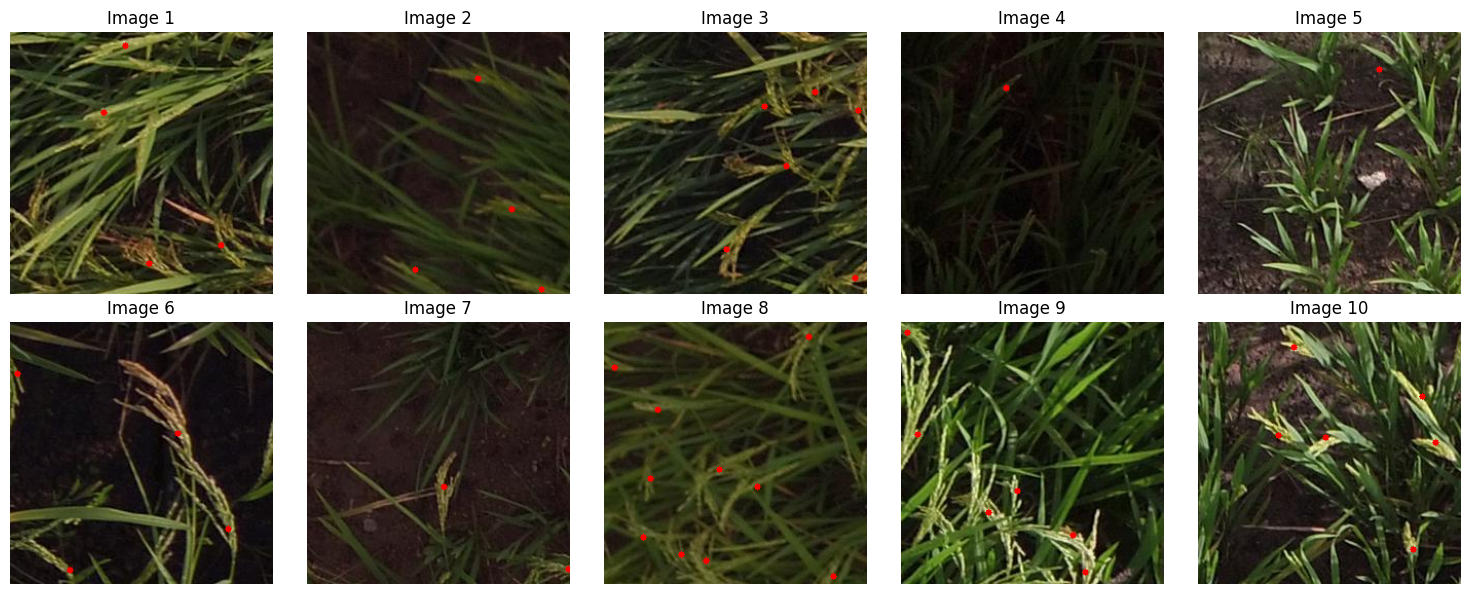

In [9]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# Define the number of random images to visualize
num_images_to_visualize = 10

# Get a list of all image and label files
image_files = os.listdir(output_img_folder)
label_files = os.listdir(output_label_folder)

# Shuffle the list to select random images
random.shuffle(image_files)

# Create a subplot for each image
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()

for i, img_file in enumerate(image_files[:num_images_to_visualize]):
    img_path = os.path.join(output_img_folder, img_file)

    # Find the corresponding label file
    label_file = img_file.replace('.jpg', '.txt')
    label_path = os.path.join(output_label_folder, label_file)

    patch_image = cv2.imread(img_path)

    # Read the coordinates from the text file
    with open(label_path, 'r') as label_file:
        coordinates = [tuple(map(float, line.strip().split())) for line in label_file]

    # Draw circles or markers on the patch image at the specified coordinates
    for x, y in coordinates:
        cv2.circle(patch_image, (int(x), int(y)), radius=3, color=(0, 0, 255), thickness=-1)  # red circle

    # Convert the BGR image to RGB (Matplotlib uses RGB format)
    patch_image_rgb = cv2.cvtColor(patch_image, cv2.COLOR_BGR2RGB)

    # Display the image with markers using Matplotlib
    axs[i].imshow(patch_image_rgb)
    axs[i].set_title(f"Image {i+1}")
    axs[i].axis('off')

# Show the Matplotlib plot
plt.tight_layout()
plt.show()